In [1]:
from analysis.pipeline import analyse, plot_classifier
from trees._AdaBoost \
    import _AdaBoostEstimator as AdaBoostedE, \
           _AdaBoostClassifier as AdaBoostedC
# from trees._BinaryDecisionTree import _BinaryTreeClassifier as BDTClass

================================== Obtaining DataFrame ===================================

================================== Training Classifier ===================================

AdaBoostClassifier(Fitted: False; 'n_boosts': 100, 'learning_rate': 1, 'voting': 'hard', 'weight_dist': 'weighted_impurity', 'algorithm': 'SAMME', 'max_depth': 4, 'min_samples_leaf': None, 'min_samples_split': None, 'train_val_frac': 0.75) 

AdaBoostClassifier(Fitted: True; 'n_boosts': 100, 'learning_rate': 1, 'voting': 'hard', 'weight_dist': 'weighted_impurity', 'algorithm': 'SAMME', 'max_depth': 4, 'min_samples_leaf': None, 'min_samples_split': None, 'train_val_frac': 0.75) 

Time Taken: 1 minute, 13 seconds and 352.32 milliseconds 

=================================== Testing Classifier ===================================

=========================== Analysing Classifier Probabilities ===========================
---------------------------------------- Results -----------------------------------------


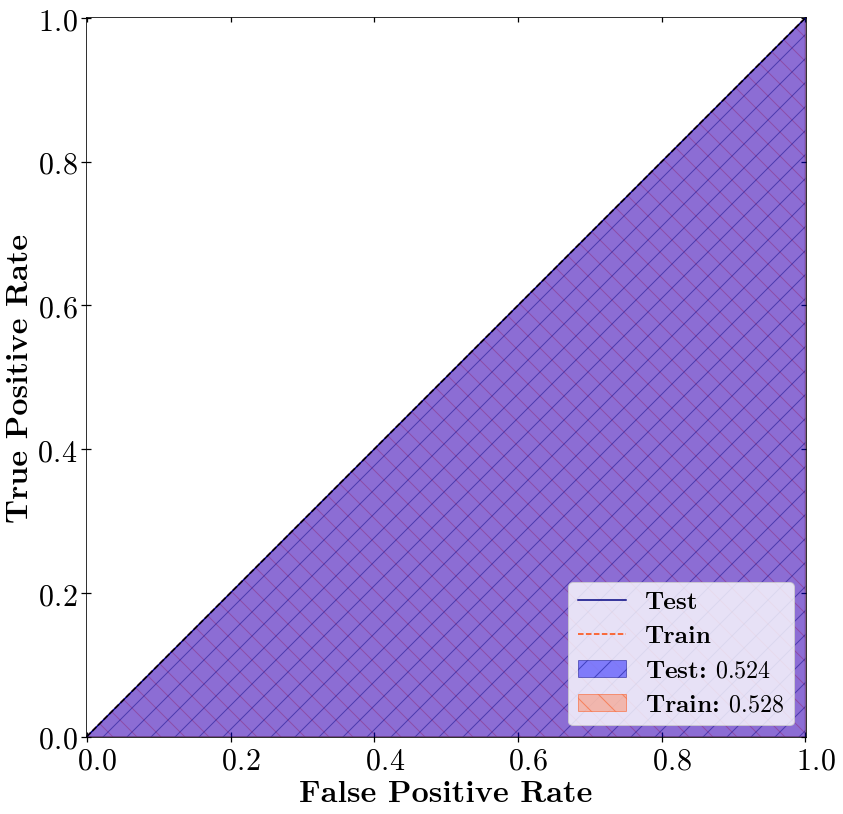

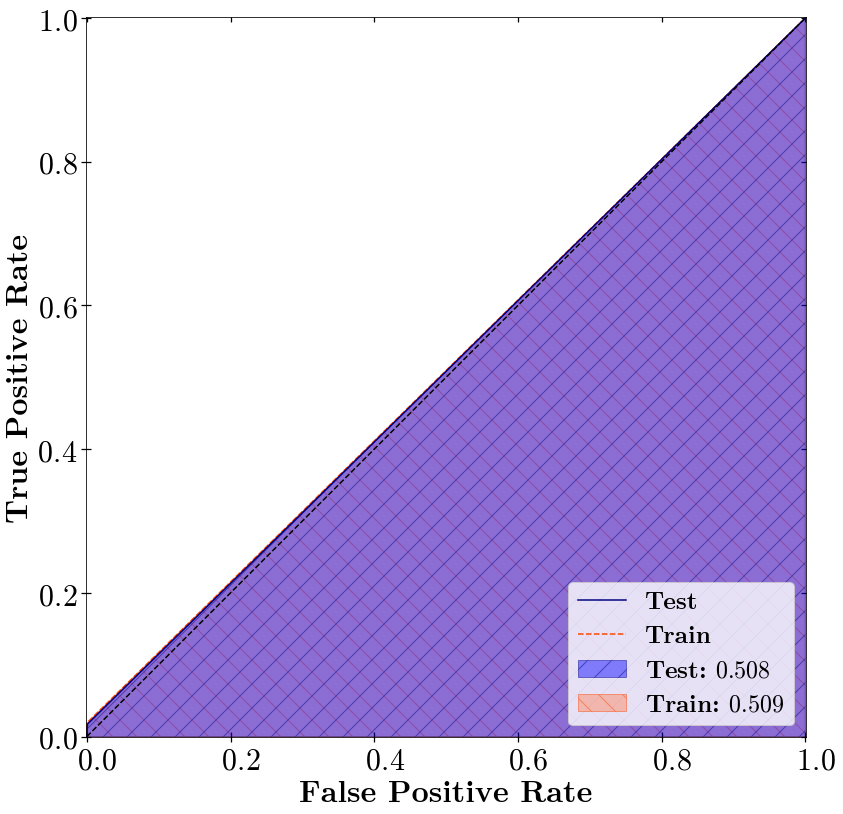

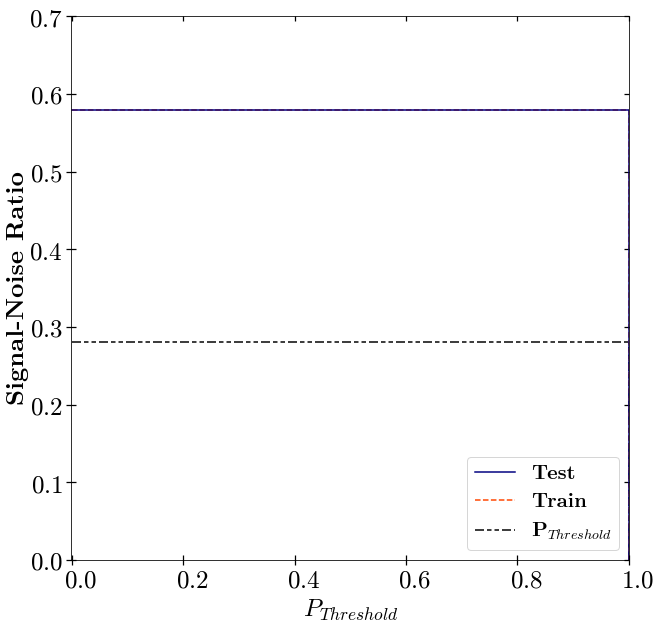

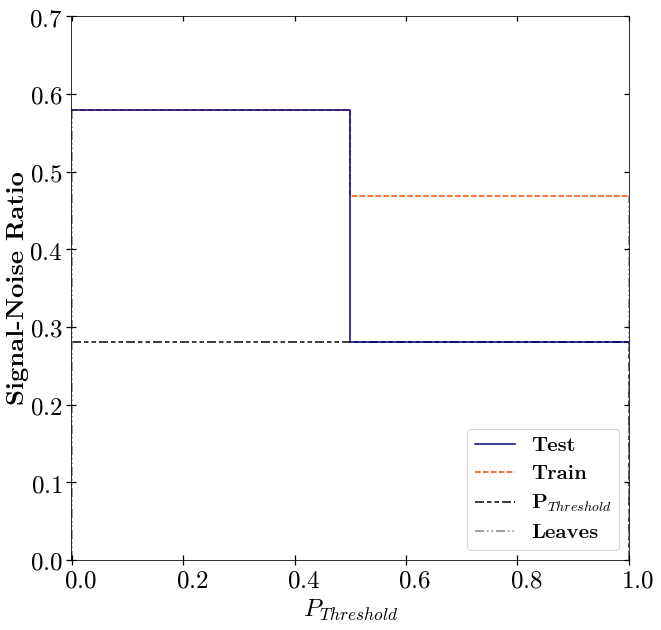

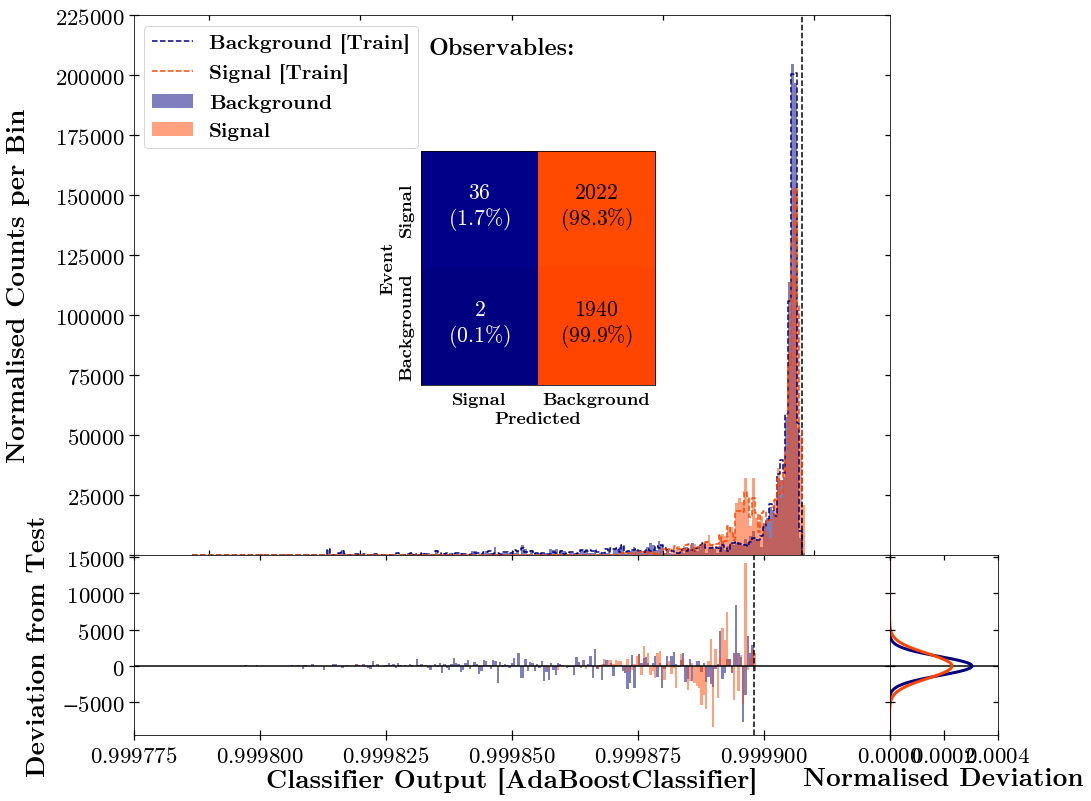

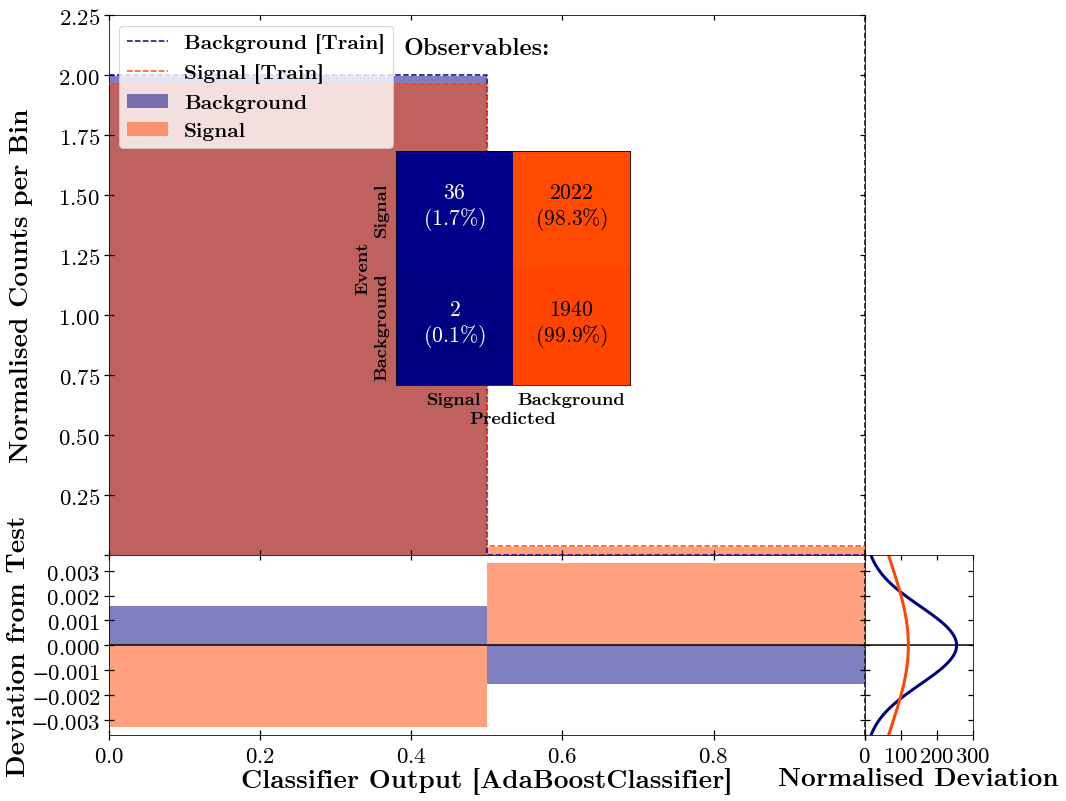

In [11]:
boosted_tree = AdaBoostedC(n_boosts=100, max_depth=4,
                           algorithm='SAMME', voting='hard')
bres, bscore = analyse("pp_2mu2e", boosted_tree,
                       {'inform':False},  # Fit kwargs
                       {},  # Predict kwargs
                       x_range=None, rseed=0 )

In [10]:
import pickle

In [36]:
depths = []
for tree in boosted_tree.classifiers:
    depths.append( tree.get_depth() )
depths

[25,
 24,
 25,
 26,
 33,
 31,
 31,
 34,
 32,
 30,
 34,
 31,
 34,
 33,
 30,
 34,
 32,
 32,
 32,
 30,
 35,
 32,
 32,
 38,
 31,
 32,
 34,
 30,
 32,
 32,
 31,
 34,
 34,
 36,
 35,
 37,
 34,
 37,
 39,
 39,
 36,
 33,
 35,
 40,
 35,
 36,
 37,
 31,
 37,
 38,
 40,
 40,
 38,
 35,
 36,
 39,
 34,
 39,
 40,
 36,
 36,
 40,
 37,
 36,
 40,
 35,
 40,
 34,
 40,
 35,
 36,
 35,
 37,
 38,
 31,
 38,
 33,
 37,
 35,
 36,
 33,
 36,
 36,
 37,
 32,
 33,
 34,
 34,
 37,
 40,
 34,
 37,
 33,
 34,
 30,
 35,
 34,
 34,
 39,
 36,
 37,
 35,
 39,
 35,
 40,
 40,
 38,
 36,
 32,
 36,
 40,
 32,
 36,
 37,
 31,
 34,
 36,
 34,
 40,
 33,
 35,
 30,
 33,
 40,
 34,
 36,
 34,
 37,
 37,
 35,
 37,
 33,
 38,
 38,
 33,
 36,
 38,
 37,
 31,
 36,
 36,
 39,
 33,
 34,
 39,
 34,
 37,
 32,
 40,
 39,
 34,
 39,
 37,
 38,
 37,
 34,
 39,
 35,
 40,
 36,
 34,
 38,
 33,
 36,
 40,
 35,
 36,
 40,
 37,
 40,
 34,
 38,
 40,
 40,
 40,
 40,
 38,
 37,
 40,
 36,
 38,
 40,
 40,
 33,
 36,
 36,
 40,
 37,
 34,
 34,
 39,
 33,
 33,
 35,
 32,
 40,
 40,
 34,
 40,
 37,


In [42]:
mov_avg = []
total = 0.0
for n, d in enumerate(depths, 1):
    total += d
    mov_avg.append( total / n)
mov_avg

[25.0,
 24.5,
 24.666666666666668,
 25.0,
 26.6,
 27.333333333333332,
 27.857142857142858,
 28.625,
 29.0,
 29.1,
 29.545454545454547,
 29.666666666666668,
 30.0,
 30.214285714285715,
 30.2,
 30.4375,
 30.529411764705884,
 30.61111111111111,
 30.68421052631579,
 30.65,
 30.857142857142858,
 30.90909090909091,
 30.956521739130434,
 31.25,
 31.24,
 31.26923076923077,
 31.37037037037037,
 31.321428571428573,
 31.344827586206897,
 31.366666666666667,
 31.35483870967742,
 31.4375,
 31.515151515151516,
 31.647058823529413,
 31.742857142857144,
 31.88888888888889,
 31.945945945945947,
 32.078947368421055,
 32.256410256410255,
 32.425,
 32.51219512195122,
 32.523809523809526,
 32.58139534883721,
 32.75,
 32.8,
 32.869565217391305,
 32.95744680851064,
 32.916666666666664,
 33.0,
 33.1,
 33.23529411764706,
 33.36538461538461,
 33.45283018867924,
 33.48148148148148,
 33.527272727272724,
 33.625,
 33.63157894736842,
 33.724137931034484,
 33.83050847457627,
 33.86666666666667,
 33.90163934426229,
 

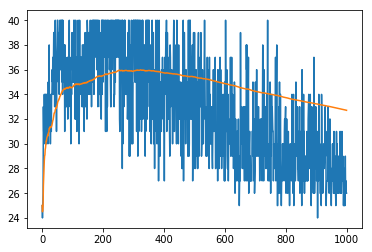

In [51]:
plt.plot(depths)
plt.plot(mov_avg)

In [48]:
mov_wavg, total = [], 0
for n, weight in enumerate(boosted_tree._vweight, 1):
    total += weight
    mov_wavg.append(total / n)

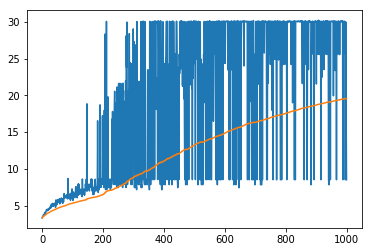

In [50]:
plt.plot(boosted_tree._vweight)
plt.plot(mov_wavg)

In [19]:
dict_to_pickle = {'AdaBoost':boosted_tree,
                  'Results':bres,
                  'Scores':bscore}

In [24]:
with open(r'Pickled Classifiers\AdaBoost\SAMME\SAMME_vbd_hard_1000_40.pickle', 'wb') as handle:
    pickle.dump(dict_to_pickle, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
with open(r'Pickled Classifiers\AdaBoost\SAMME\SAMME_vbd_hard_1000_40.pickle', 'rb') as handle:
    loaded = pickle.load(handle)

In [26]:
loaded

{'AdaBoost': <AdaBoostClassifier(Fitted: True; 'n_boosts': 1000, 'learning_rate': 1, 'voting': 'hard', 'weight_dist': 'weighted_impurity', 'algorithm': 'SAMME', 'max_depth': 40, 'min_samples_leaf': None, 'min_samples_split': None, 'train_val_frac': 0.75)>,
 'Results': OrderedDict([('Test',
               (array([1, 1, 1, ..., 0, 0, 0], dtype=int64),
                array([0.88055866, 0.88079708, 0.67055981, ..., 0.51292501, 0.55160088,
                       0.53288756]))),
              ('Train',
               (array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
                array([0.5       , 0.50761661, 0.52192168, ..., 0.88079708, 0.82607996,
                       0.88079708])))]),
 'Scores': {'cm': {'tn': 2043, 'fp': 0, 'fn': 469, 'tp': 1488},
  'a': 0.88275,
  'p': 1.0,
  'tpr': 0.7603474706182933,
  'fpr': 0.0,
  'f1': 0.8970362239297475,
  'auc': 0.9574208177730157,
  's/b': 3.9426232317937004,
  'rmsd': {'b': 3.727016361036837, 's': 0.8888061325529708},
  'p_thres': 0.8708883036

==================================== Plotting Results ====================================
--------------------------------------- ROC Curve ----------------------------------------
Time Taken: 5 seconds and 704.53 milliseconds
--------------------------------------- SNR Curve ----------------------------------------
Time Taken: 10 seconds and 969.43 milliseconds
--------------------------------- Histogram Distribution ---------------------------------
Time Taken: 628.01 milliseconds


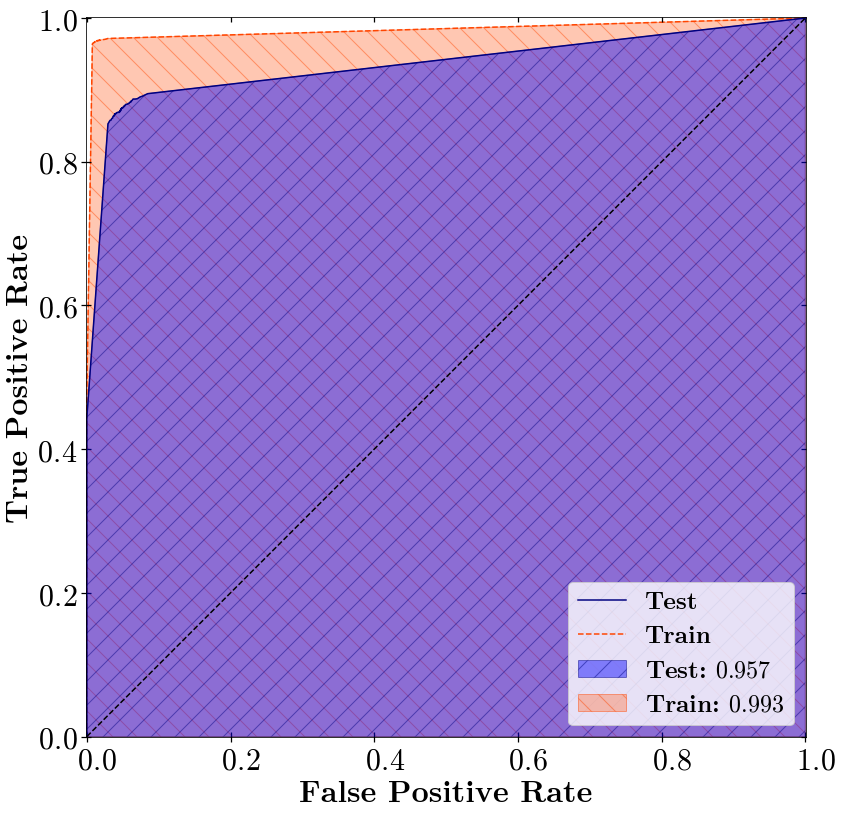

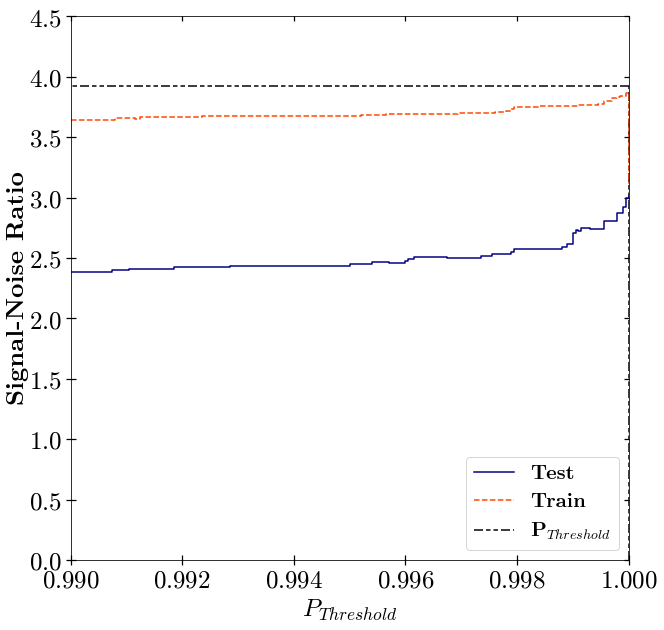

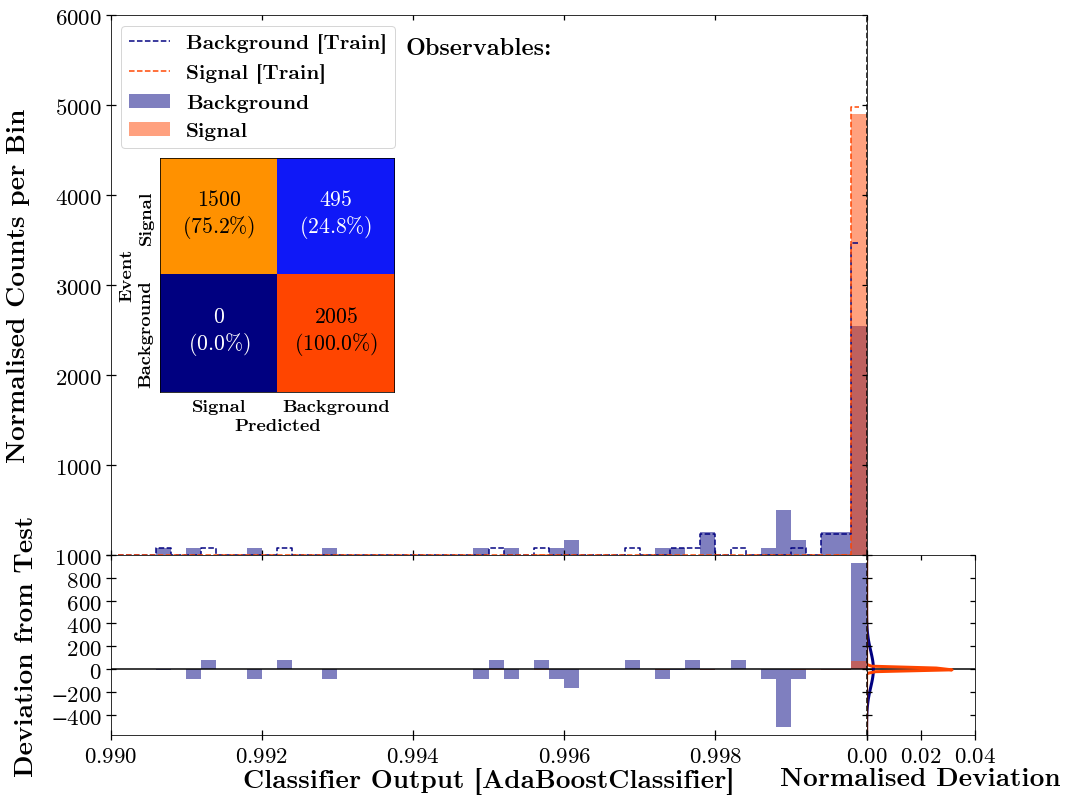

In [7]:
plot_classifier(boosted_tree, bres, p_thres=bscore['p_thres'],
                n_bins=50, x_range=(0.99, 1.0),
                cm_pos=(-0.275, -0.01))

In [25]:
from importlib import reload
import analysis.plotting.clout
import analysis.pipeline
reload( analysis.plotting.clout )
reload( analysis.pipeline )
from analysis.pipeline import analyse, plot_classifier

In [42]:
bres = tmp.copy()

In [41]:
for k, v in list(tmp.items()):
    nk = k.replace('[', '').replace(']', '')
    if nk != k:
        tmp[nk] = v
        del tmp[k]
tmp

OrderedDict([('Test',
              (array([1, 1, 1, ..., 0, 0, 0], dtype=int64),
               array([0.55946784, 0.52581389, 0.60310751, ..., 0.37456946, 0.46443038,
                      0.44274646]))),
             ('Train',
              (array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
               array([0.5860221 , 0.45240464, 0.43714142, ..., 0.68508358, 0.58375709,
                      0.53797106])))])

==================================== Plotting Results ====================================
--------------------------------------- ROC Curve ----------------------------------------
Time Taken: 5 seconds and 512 milliseconds
--------------------------------------- SNR Curve ----------------------------------------
Time Taken: 10 seconds and 486.38 milliseconds
--------------------------------- Histogram Distribution ---------------------------------
Time Taken: 561.6 milliseconds


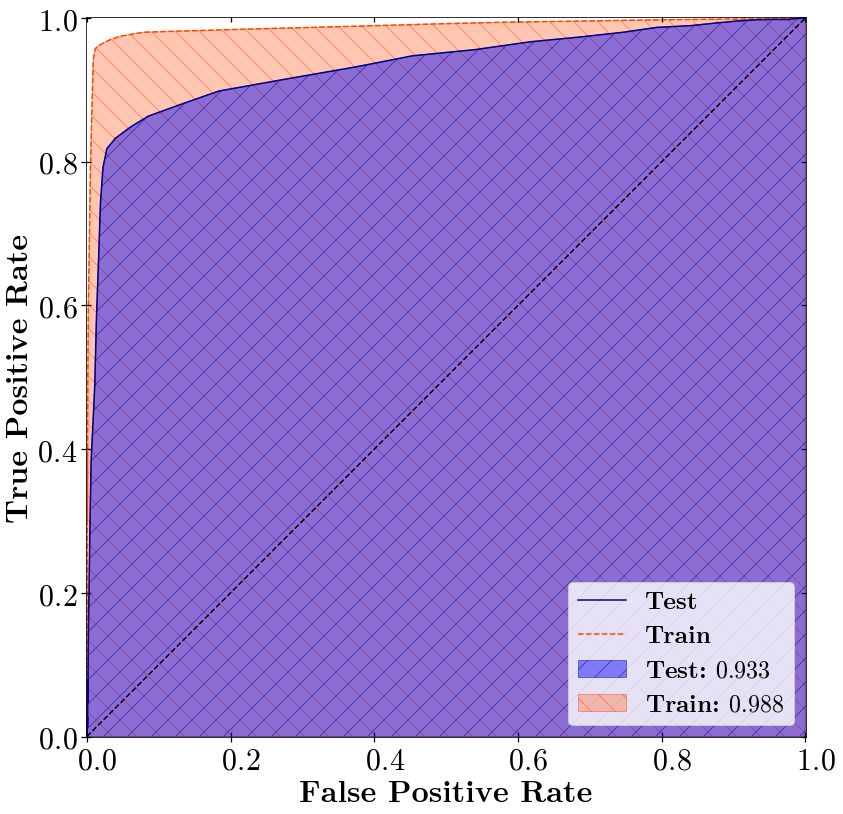

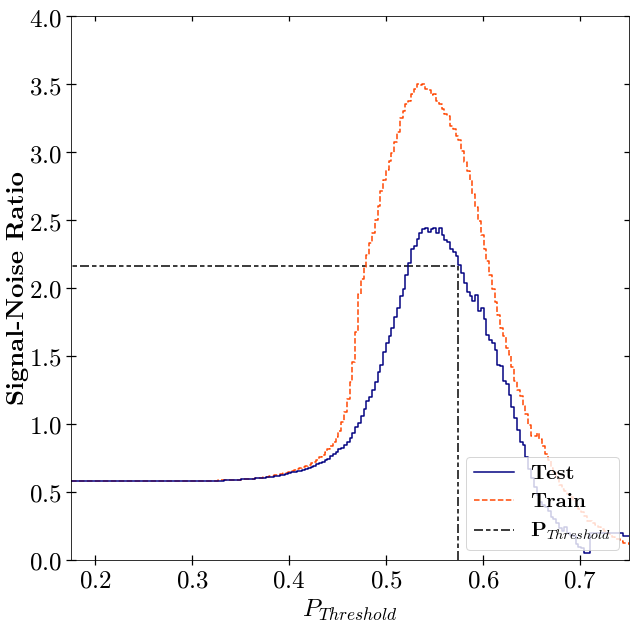

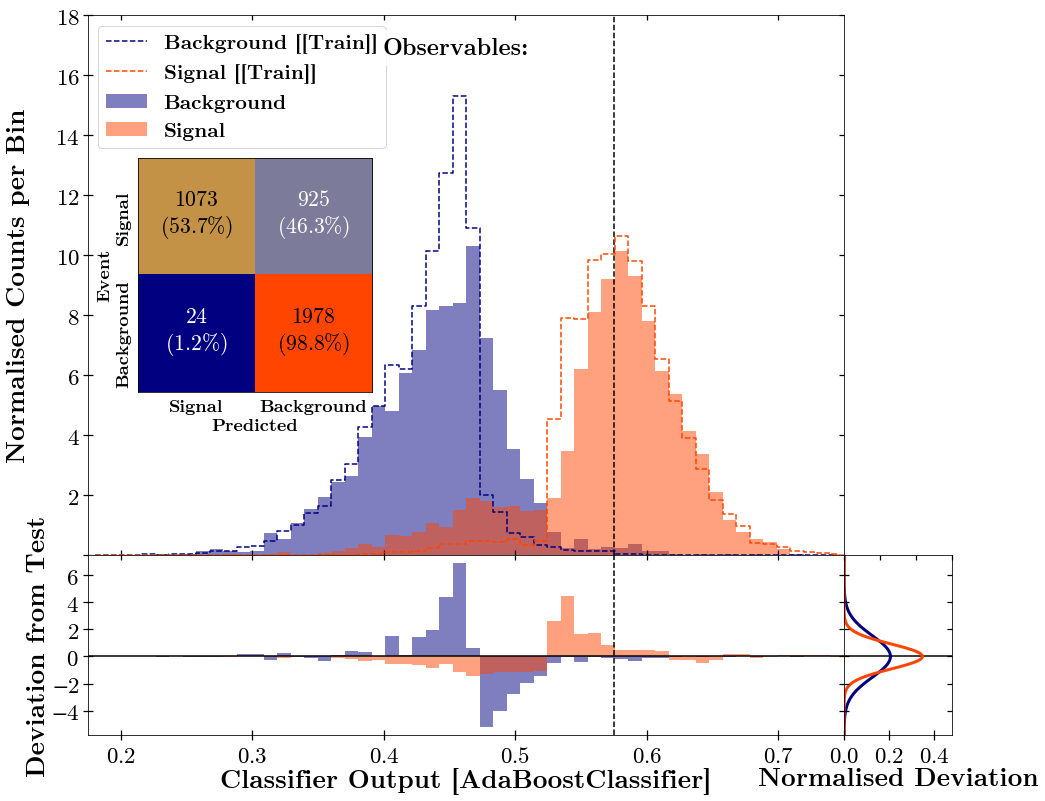

In [43]:
plot_classifier(boosted_tree, bres, p_thres=bscore['p_thres'],
                n_bins='auto', x_range=(0.175, 0.75),
                cm_pos=(-0.275, -0.01))

==================================== Plotting Results ====================================
--------------------------------------- ROC Curve ----------------------------------------
Time Taken: 5 seconds and 418.62 milliseconds
--------------------------------------- SNR Curve ----------------------------------------
Time Taken: 10 seconds and 248.82 milliseconds
--------------------------------- Histogram Distribution ---------------------------------
Time Taken: 568.68 milliseconds


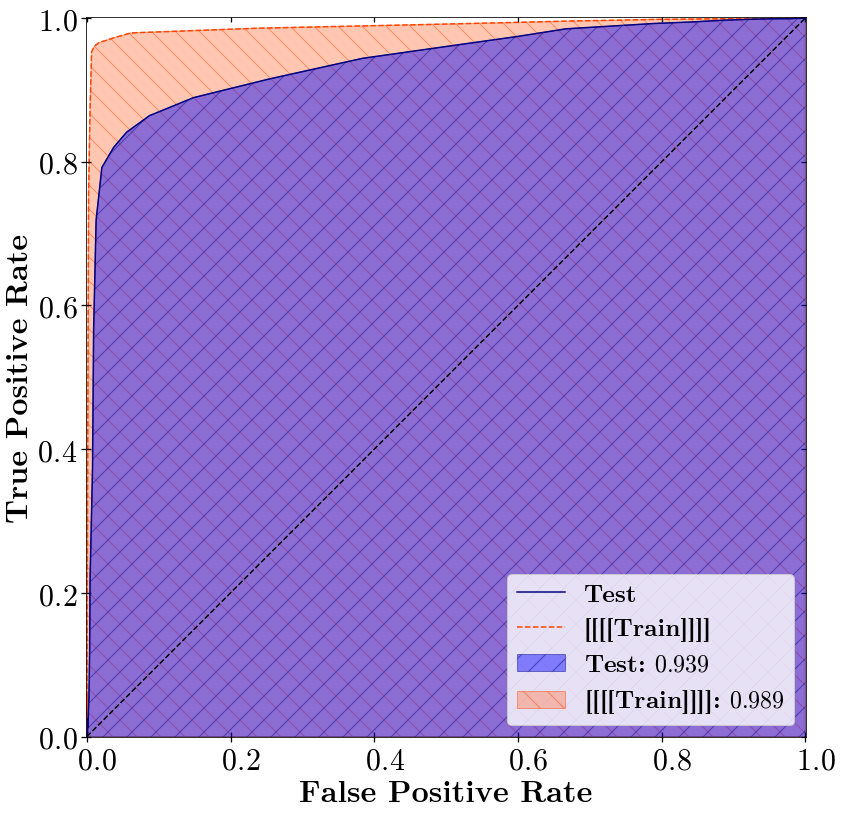

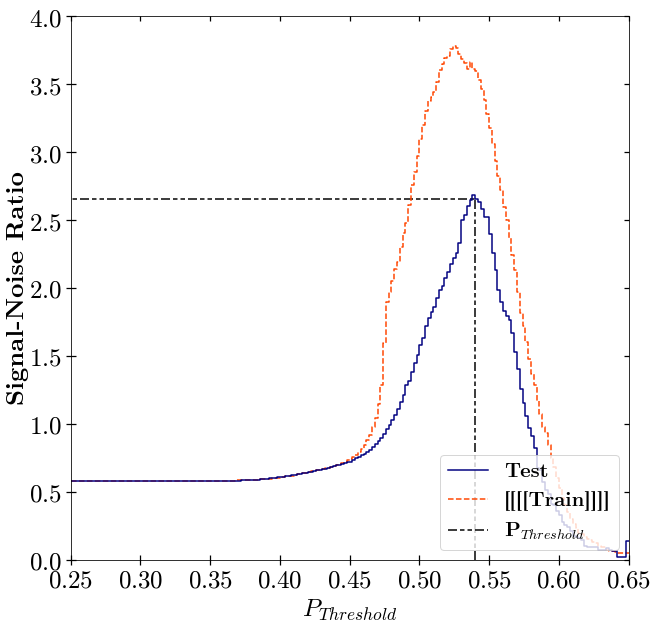

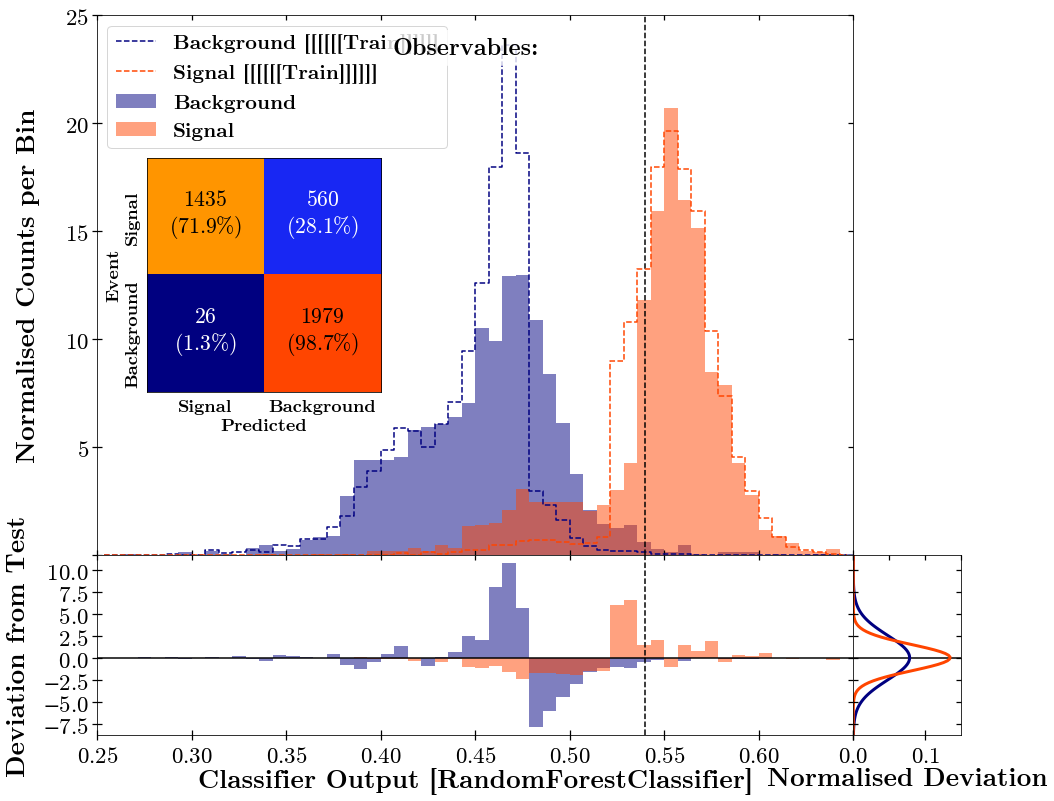

In [27]:
plot_classifier(boosted_tree, bres, p_thres=bscore['p_thres'],
                n_bins='auto', x_range=(0.25, 0.65),
                cm_pos=(-0.275, -0.01))

In [11]:
reload(analysis.plotting.clout)
reload(analysis.pipeline)
import analysis.plotting.clout
import analysis.pipeline

In [3]:
# from sklearn.ensemble import AdaBoostClassifier as SKLAdaBoostC
from sklearn.model_selection import StratifiedKFold
# from humanfriendly import format_timespan
import dwrangling.pipelines as DWP
import analysis.metrics as AME
# from timeit import Timer
import numpy as np
# import random

In [4]:
boosts = sorted(set([order * section
                     for order in [1, 5, 10, 50, 100, 500, 1000]
                     for section in [1, 2, 3, 4, 5, 7, 9]]))
print(f'The boosts shall be: {boosts}')

df = DWP.get_opt_dataframe("pp_2mu2e")
X, y = df.ML_input()

points = []
skf = StratifiedKFold(n_splits=5)
for n_boosts in boosts:
    print(f'{n_boosts:-^90}')
    
    snrs = np.empty(5, dtype=np.float64)
    for n, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
          
        abc = AdaBoostedC(n_estimators=n_boosts)
        abc.fit(X_train, y_train)
        y_pred = abc.predict_prob(X_test)
          
        p_thres = AME.find_p_threshold(y_test, y_pred)
        snr = AME.S_B_ratio(y_test, y_pred, p_threshold=p_thres)
          
        snrs[n] = snr
    points.append((n_boosts, snrs.mean(), snrs.std()))
    
np.save("adaboost_nboost_vs_snr", np.array(points), allow_pickle=True)

The boosts shall be: [1, 2, 3, 4, 5, 7, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 70, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500, 700, 900, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 7000, 9000]
--------------------------------------------1---------------------------------------------
--------------------------------------------2---------------------------------------------
--------------------------------------------3---------------------------------------------
--------------------------------------------4---------------------------------------------
--------------------------------------------5---------------------------------------------
--------------------------------------------7---------------------------------------------
--------------------------------------------9---------------------------------------------
--------------------------------------------10--------------------------------------------
--------------------------------------------15------------------

In [12]:
saved_points = np.load("adaboost_nboost_vs_snr.npy")

In [5]:
points

[(1, 3.695278416115962, 0.0950293434067809),
 (2, 3.621140923493988, 0.25480507845047773),
 (3, 3.560282063558821, 0.25918021385349066),
 (4, 2.7956397456351723, 0.9564815205843888),
 (5, 3.569457876365699, 0.24408276050105102),
 (7, 3.1554419184764764, 1.012486371773635),
 (9, 3.591991838622738, 0.2826302333683829),
 (10, 3.7035408080404153, 0.1206624464759459),
 (15, 3.158772160456074, 1.0588836729541624),
 (20, 3.478261791569431, 0.1903086011306051),
 (25, 3.086159560439582, 1.0037859141008),
 (30, 3.102101942897716, 1.0270559461416975),
 (35, 3.1865789993252878, 1.0897088548892966),
 (40, 3.618864959009465, 0.2591799195575319),
 (45, 3.2064391402126633, 1.0497236839133552),
 (50, 3.5589708701648477, 0.1675317094068721),
 (70, 3.6719851585790453, 0.13881919781620397),
 (90, 3.222366896320223, 1.042399497480407),
 (100, 3.2199750171553445, 1.0574123865722225),
 (150, 3.6618381156013746, 0.14565555935858412),
 (200, 3.7140061969986577, 0.1595799081978321),
 (250, 3.7247887903589323, 0

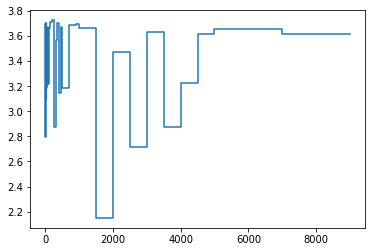

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(*list(zip(*points))[:-1:], ls='steps')

In [72]:
print("THis is a really really long long long sentacne that goes over"
      "two line, to check it you cane remove the plus symbol from a "
      "print statement like with an error.")

THis is a really really long long long sentacne that goes overtwo line, to check it you cane remove the plus symbol from a print statement like with an error.


In [44]:
from scipy.interpolate import interp1d

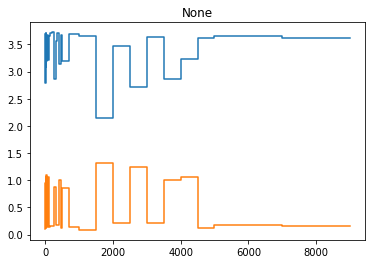

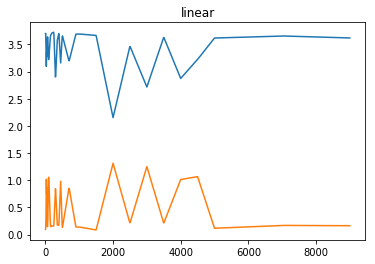

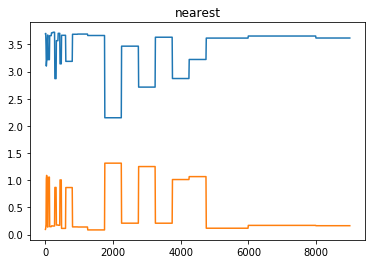

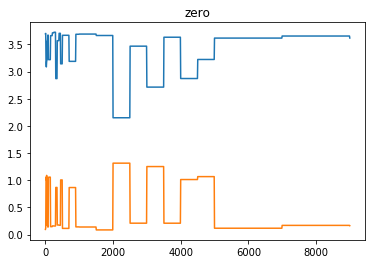

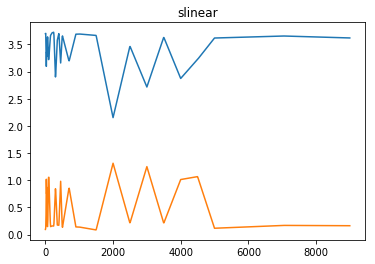

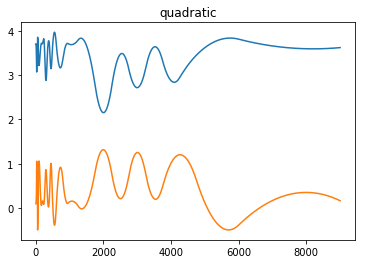

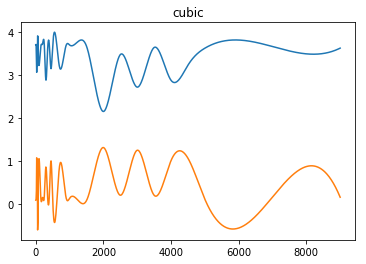

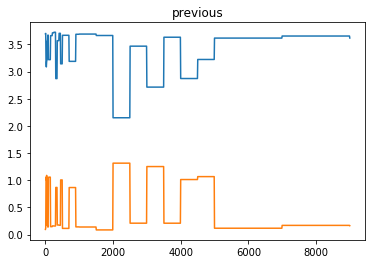

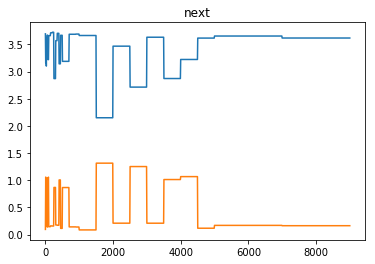

In [63]:
x_, y_, e_ = list(zip(*points))
x_, y_, e_ = np.array(x_), np.array(y_), np.array(e_)
x = np.linspace(x_.min(), x_.max(), 1000)

figures = {}

figures[None] = plt.figure()
ax = figures[None].add_subplot(111)
ax.plot(x_, y_, ls='steps')
ax.plot(x_, e_, ls='steps')
ax.set_title('None')

for kind in ['linear', 'nearest', 'zero', 'slinear',
             'quadratic', 'cubic', 'previous', 'next']:
    figures[kind] = plt.figure()
    ax = figures[kind].add_subplot(111)
    
    f = interp1d(x_, y_, kind=kind, assume_sorted=True)
    g = interp1d(x_, e_, kind=kind, assume_sorted=True)
    
    y = f(x)
    ax.plot(x, y)
    
    y = g(x)
    ax.plot(x, y)
    
    ax.set_title(kind)

In [64]:
from scipy.interpolate import UnivariateSpline

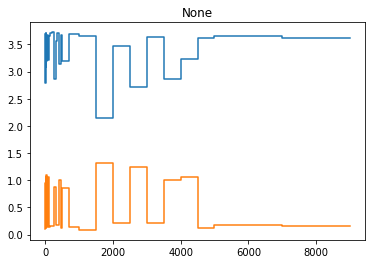

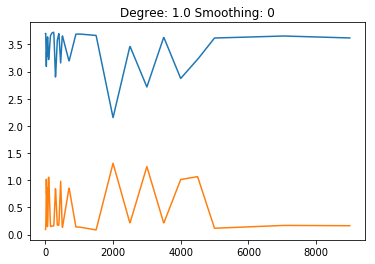

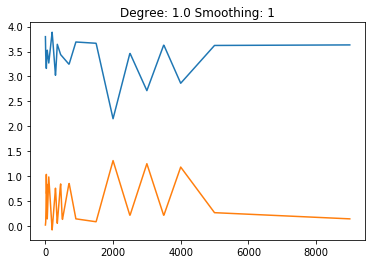

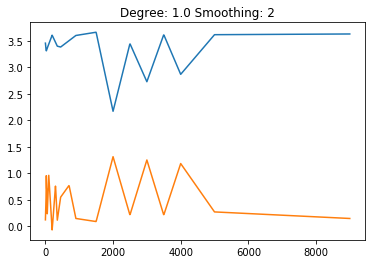

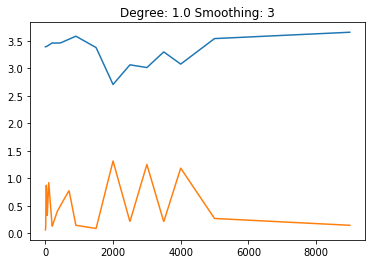

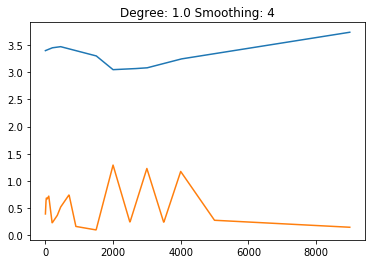

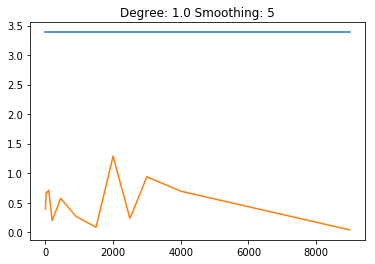

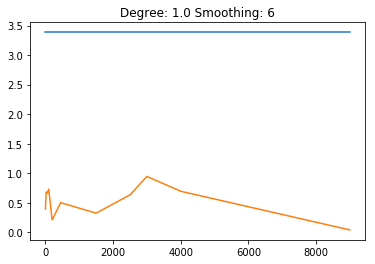

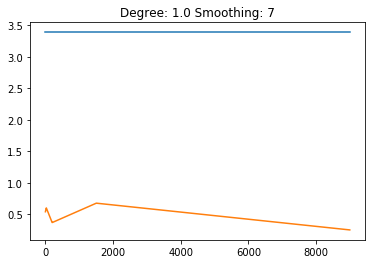

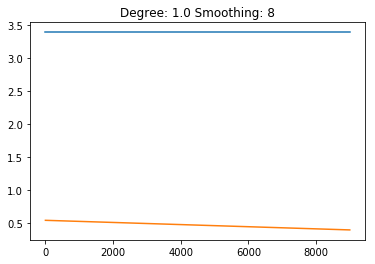

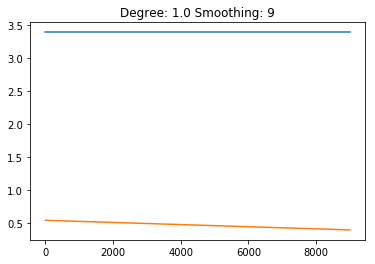

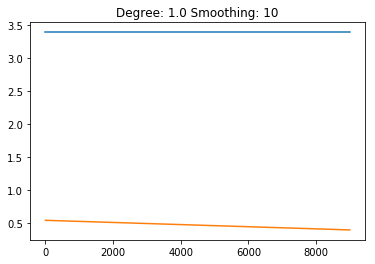

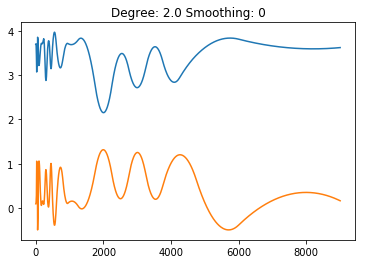

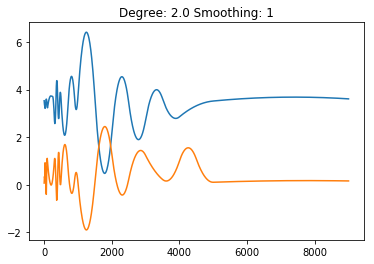

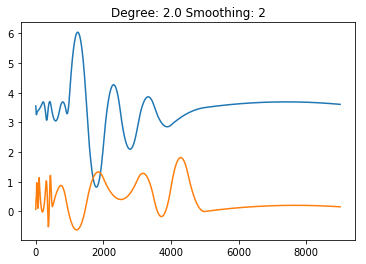

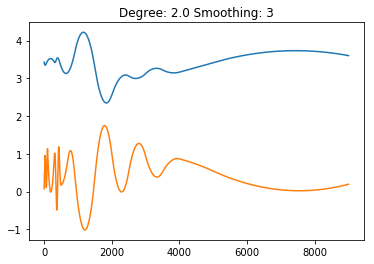

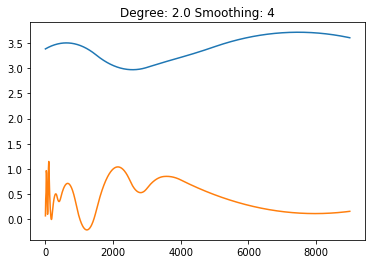

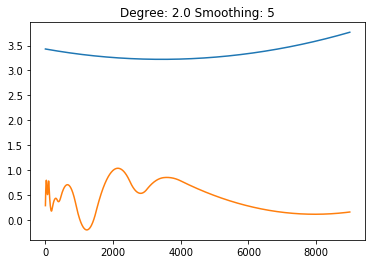

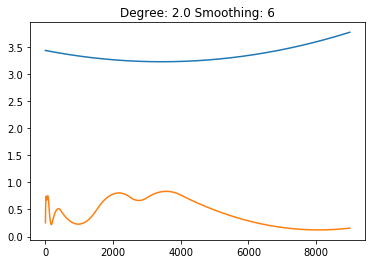

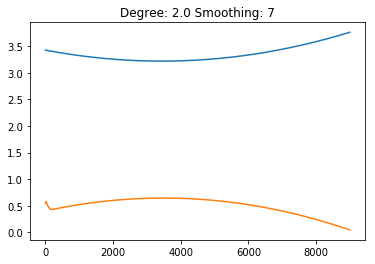

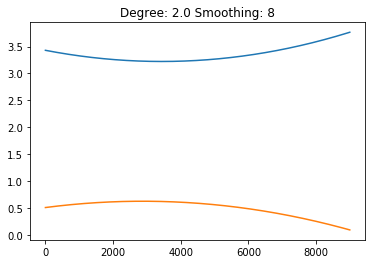

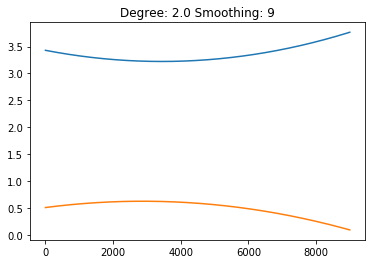

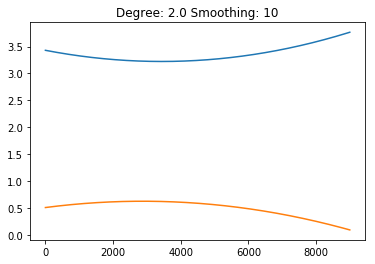

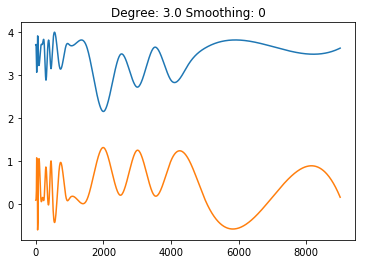

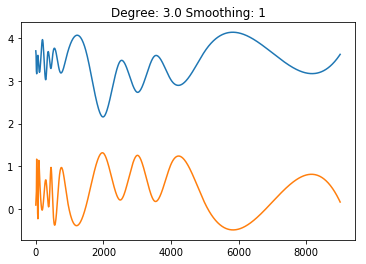

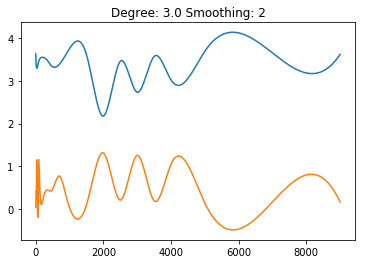

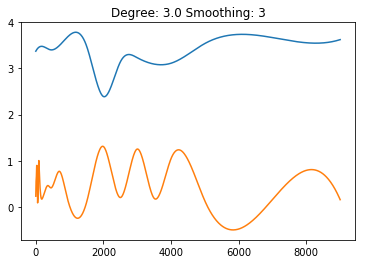

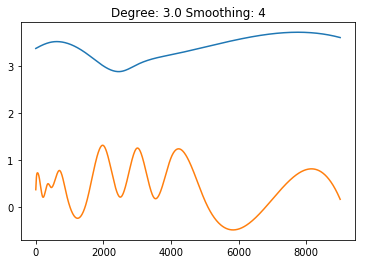

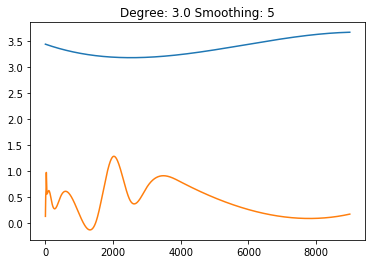

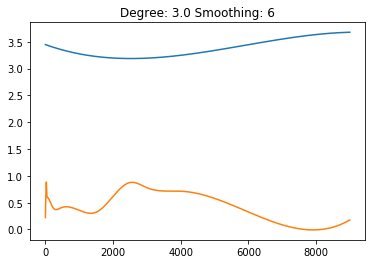

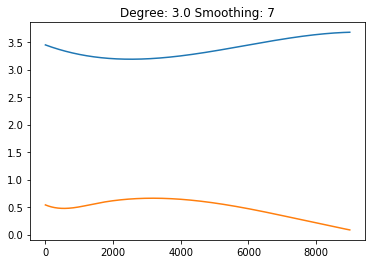

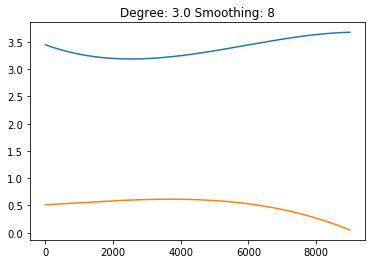

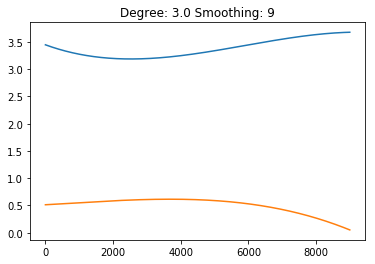

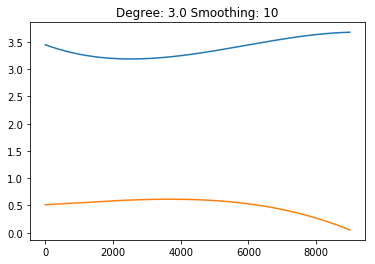

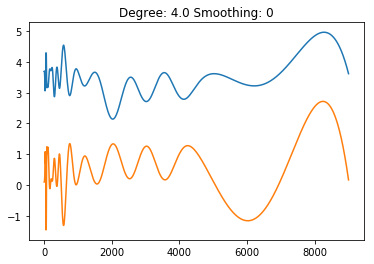

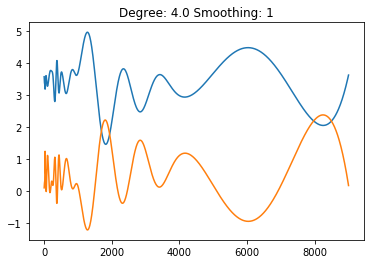

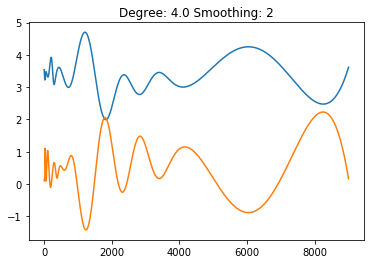

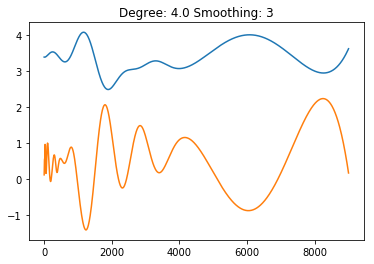

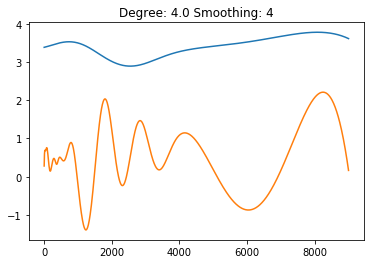

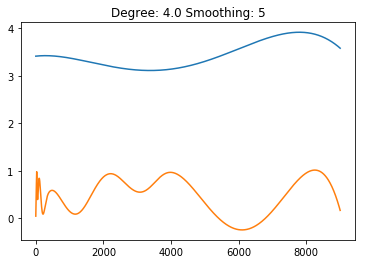

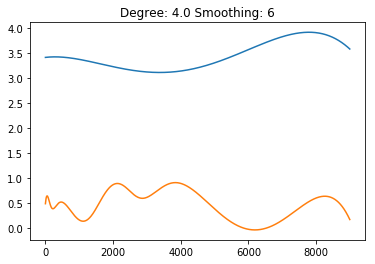

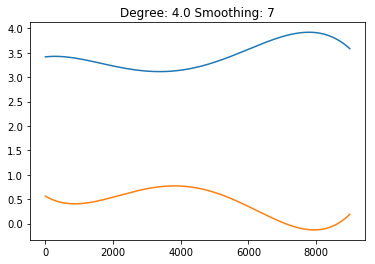

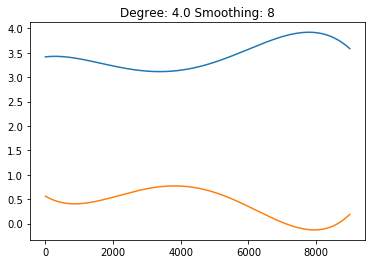

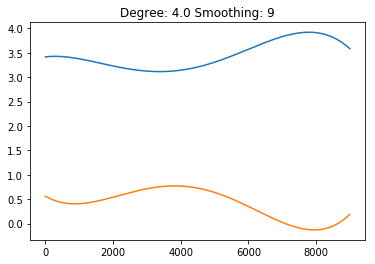

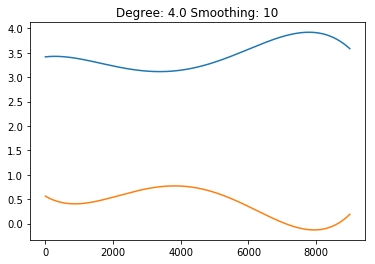

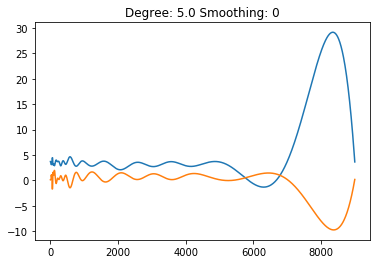

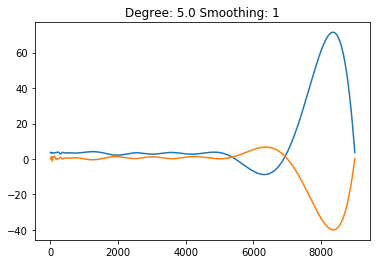

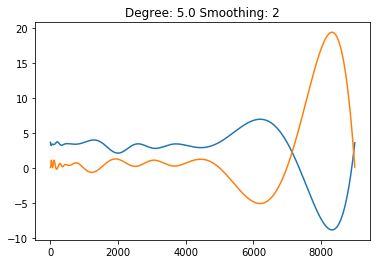

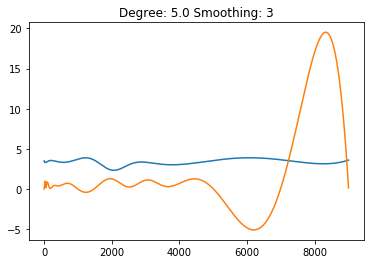

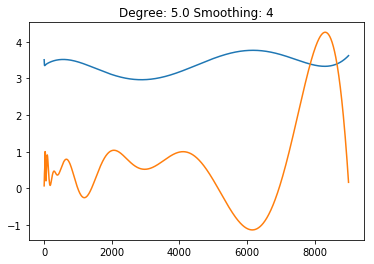

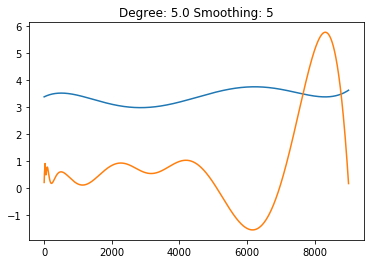

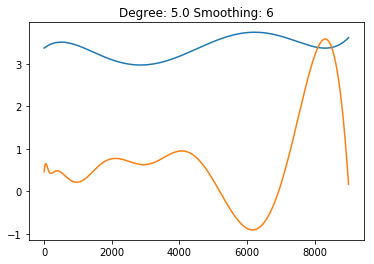

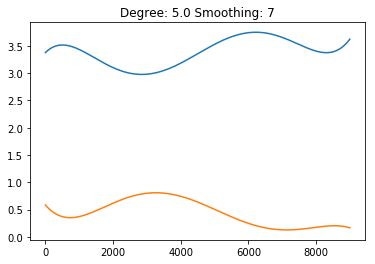

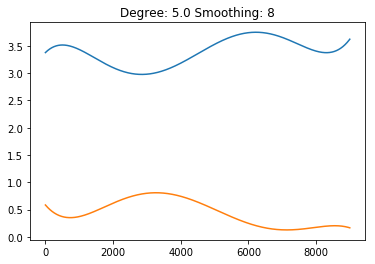

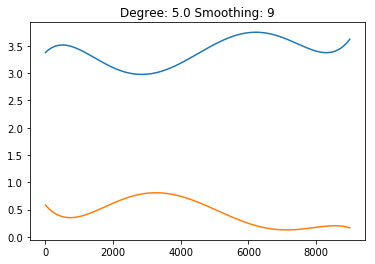

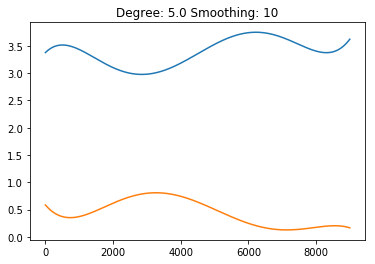

In [71]:
x_, y_, e_ = list(zip(*points))
x_, y_, e_ = np.array(x_), np.array(y_), np.array(e_)
x = np.linspace(x_.min(), x_.max(), 1000)

figures = {}

figures[None] = plt.figure()
ax = figures[None].add_subplot(111)
ax.plot(x_, y_, ls='steps')
ax.plot(x_, e_, ls='steps')
ax.set_title('None')

for degree in np.linspace(1, 5, 5):
    for smoothing in np.linspace(0, 10, 11):
        figures[(degree,smoothing)] = plt.figure()
        ax = figures[(degree,smoothing)].add_subplot(111)

        f = UnivariateSpline(x_, y_, k=degree, s=smoothing, ext=3)
        g = UnivariateSpline(x_, e_, k=degree, s=smoothing, ext=3)

        y = f(x)
        ax.plot(x, y)

        y = g(x)
        ax.plot(x, y)

        ax.set_title(f'Degree: {degree:.1f} Smoothing: {smoothing:.0f}')